<a href="https://colab.research.google.com/github/nidhi-158/Flight-price/blob/main/FlightPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [3]:
business_df=pd.read_csv("/content/business.csv")

In [4]:
economy_df=pd.read_csv("/content/economy.csv")

In [5]:
business_df.shape

(93487, 11)

In [6]:
economy_df.shape

(206774, 11)

In [7]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [8]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [9]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [10]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [11]:
business_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [12]:
economy_df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [13]:
business_df['class']='Business'
economy_df['class']='Economy'

In [14]:
business_df['stop'] = business_df['stop'].str.replace(r'\n', ' ', regex=True)
business_df['stop'] = business_df['stop'].str.replace(r'\t', ' ', regex=True)

# Save back to the original CSV file
business_df.to_csv("/content/business.csv", index=False)

In [15]:
# Remove '\n' and '\t' characters from 'stop' column in economy_df
economy_df['stop'] = economy_df['stop'].str.replace(r'\n', ' ', regex=True)
economy_df['stop'] = economy_df['stop'].str.replace(r'\t', ' ', regex=True)

# Save back to the original CSV file
economy_df.to_csv("/content/economy.csv", index=False)

In [16]:
df=pd.concat([business_df,economy_df],ignore_index=True)

In [17]:
df.rename(columns={'from':'From','dep_time':'Departure_time','arr_time':'Arrival_time','time_taken':'Duration','to':'To'},inplace=True)

In [18]:
df.shape

(300261, 12)

In [19]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'Departure_time', 'From',
       'Duration', 'stop', 'Arrival_time', 'To', 'price', 'class'],
      dtype='object')

In [20]:
df['price'] =df['price'].str.replace(',', '', regex=True)

In [21]:
df['price'] = df['price'].astype(int)

<Axes: xlabel='class', ylabel='price'>

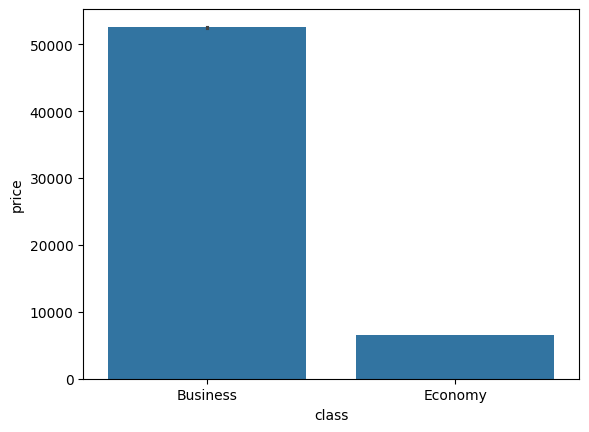

In [22]:
sns.barplot(x='class',y='price',data=df)

In [23]:
airline_Count = df.groupby(['airline', 'class']).size().reset_index(name='count')

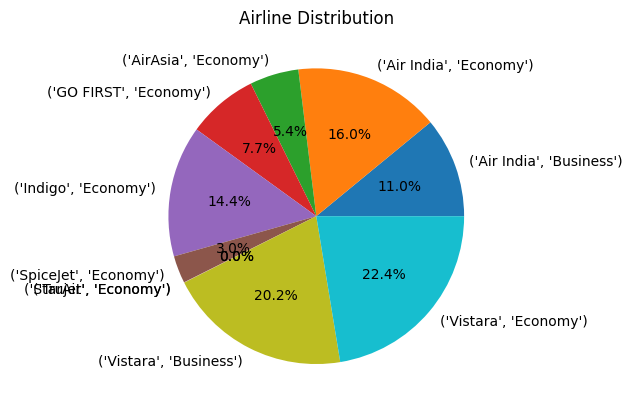

In [24]:
plt.pie(airline_Count['count'], labels=airline_Count[['airline', 'class']].apply(tuple, axis=1), autopct='%1.1f%%')
plt.title('Airline Distribution')
plt.show()

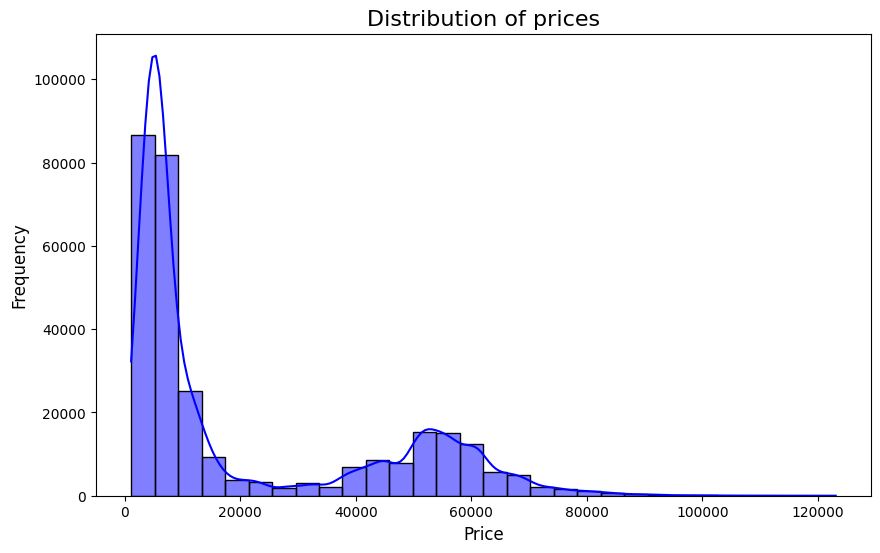

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],kde=True,color='blue',bins=30)
plt.title('Distribution of prices',fontsize=16)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.show()

<ipython-input-26-8bbf902f0f3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='price', data=df, palette='Set2')


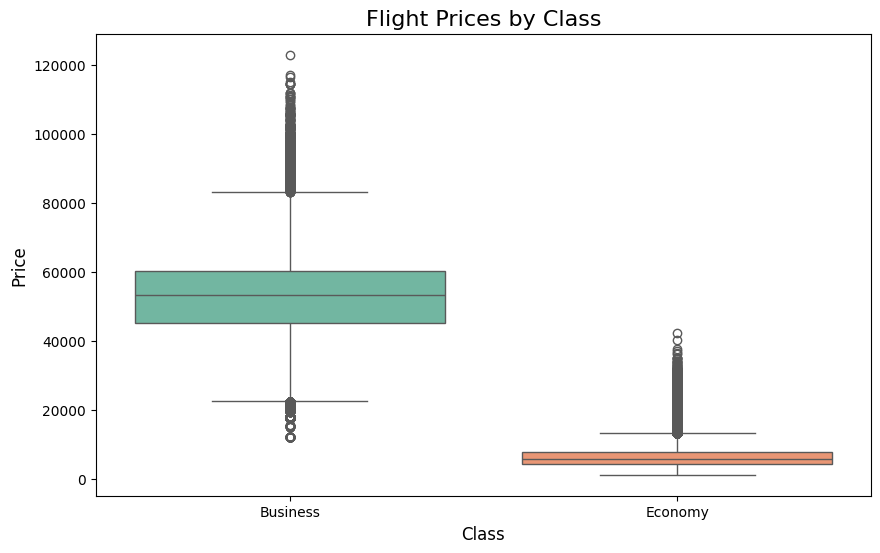

In [26]:
# Boxplot of Price by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=df, palette='Set2')
plt.title('Flight Prices by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

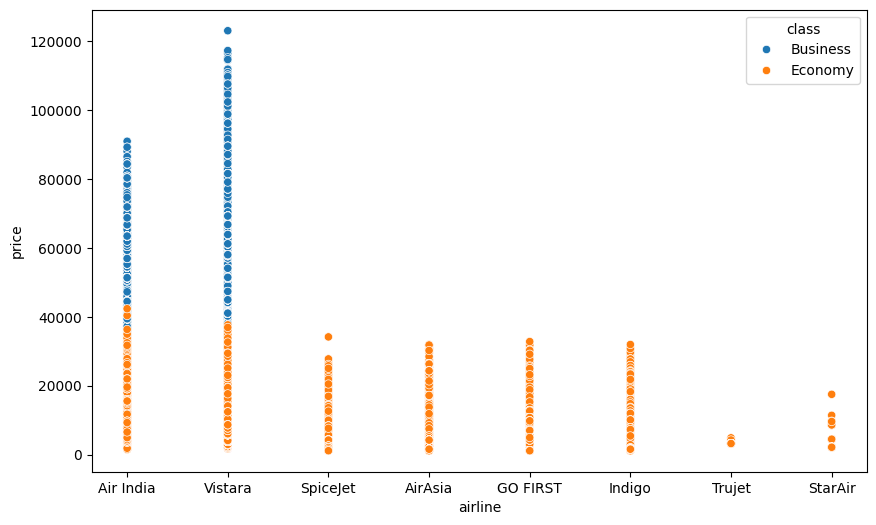

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='airline',y='price',hue='class',data=df)
plt.show()

In [28]:
from_flights=df.groupby('From').size().reset_index(name='count')

In [29]:
from_flights

,From,count
0,Bangalore,52106
1,Chennai,38700
2,Delhi,61345
3,Hyderabad,40860
4,Kolkata,46347
5,Mumbai,60903


<ipython-input-30-e74663b03f69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='From',y='count',data=from_flights,palette='coolwarm')


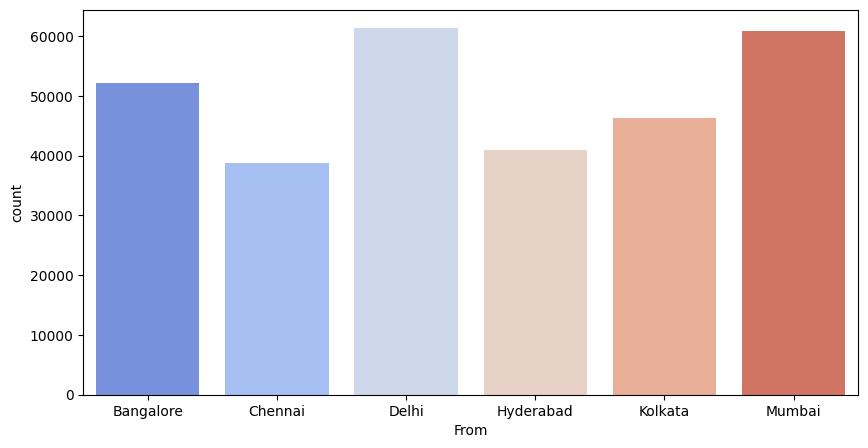

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='From',y='count',data=from_flights,palette='coolwarm')
plt.show()

In [31]:
to_flights=df.groupby('To').size().reset_index(name='count')

In [32]:
to_flights

,To,count
0,Bangalore,51112
1,Chennai,40368
2,Delhi,57361
3,Hyderabad,42776
4,Kolkata,49535
5,Mumbai,59109


<ipython-input-33-75ec333fdc25>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='To',y='count',data=to_flights,palette='viridis')


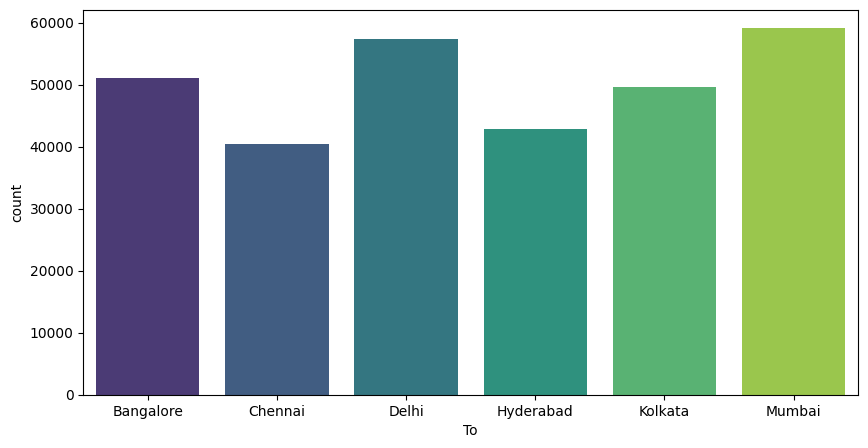

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='To',y='count',data=to_flights,palette='viridis')
plt.show()

In [34]:
class_Count=df.groupby('class').size().reset_index(name='count')

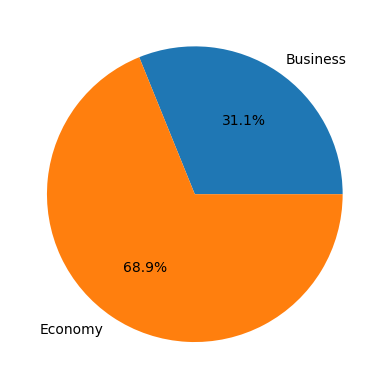

In [35]:
plt.pie(class_Count['count'],labels=class_Count['class'],autopct='%1.1f%%')
plt.show()

In [36]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

In [37]:
df['Day']=df['date'].dt.day
df['Month']=df['date'].dt.month
df['Year']=df['date'].dt.year
df['Day_of_week']=df['date'].dt.dayofweek  #0:Monday,6:Sumday

df['Isweekend']=df['date'].dt.dayofweek.apply(lambda x:1 if x >= 5 else 0) #1:saturday/sunday

In [38]:
df.drop('date',axis=1)

,airline,ch_code,num_code,Departure_time,From,Duration,stop,Arrival_time,To,price,class,Day,Month,Year,Day_of_week,Isweekend
0,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,Business,11,2,2022,4,0
1,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,Business,11,2,2022,4,0
2,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,Business,11,2,2022,4,0
3,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,Business,11,2,2022,4,0
4,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,Business,11,2,2022,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7697,Economy,31,3,2022,3,0
300257,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,7709,Economy,31,3,2022,3,0
300258,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop,09:05,Hyderabad,8640,Economy,31,3,2022,3,0
300259,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop,09:05,Hyderabad,8640,Economy,31,3,2022,3,0


In [39]:
# Group by 'Year' and count the number of flights
yearly_flights = df.groupby('Year').size().reset_index(name='count')

In [40]:
monthly_flights=df.groupby('Month').size().reset_index(name='count')

In [41]:
monthly_flights

,Month,count
0,2,100589
1,3,199672


<ipython-input-42-14787a76657f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month',y='count',data=monthly_flights,palette='viridis')


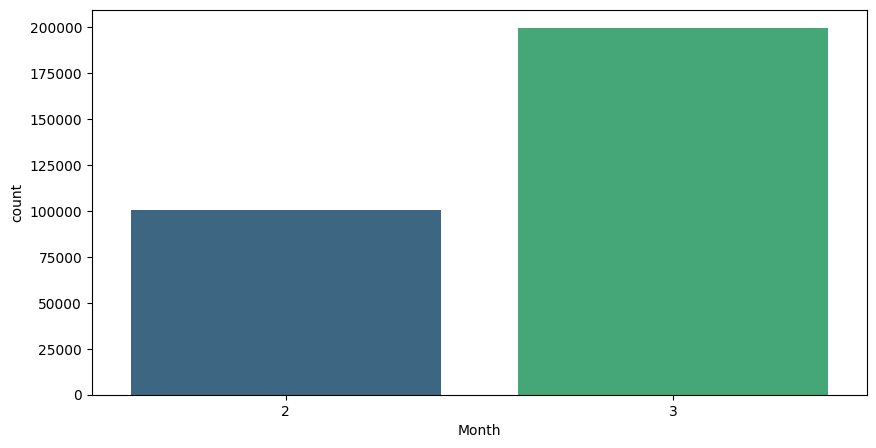

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='count',data=monthly_flights,palette='viridis')
plt.show()

In [43]:
monthly_price=df.groupby('Month')['price'].mean().reset_index()

In [44]:
monthly_price

,Month,price
0,2,23835.836791
1,3,19396.525116


In [45]:
daily_flights=df.groupby('Day').size().reset_index(name='count')

<ipython-input-46-5b75080061d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day',y='count',data=daily_flights,palette='viridis')


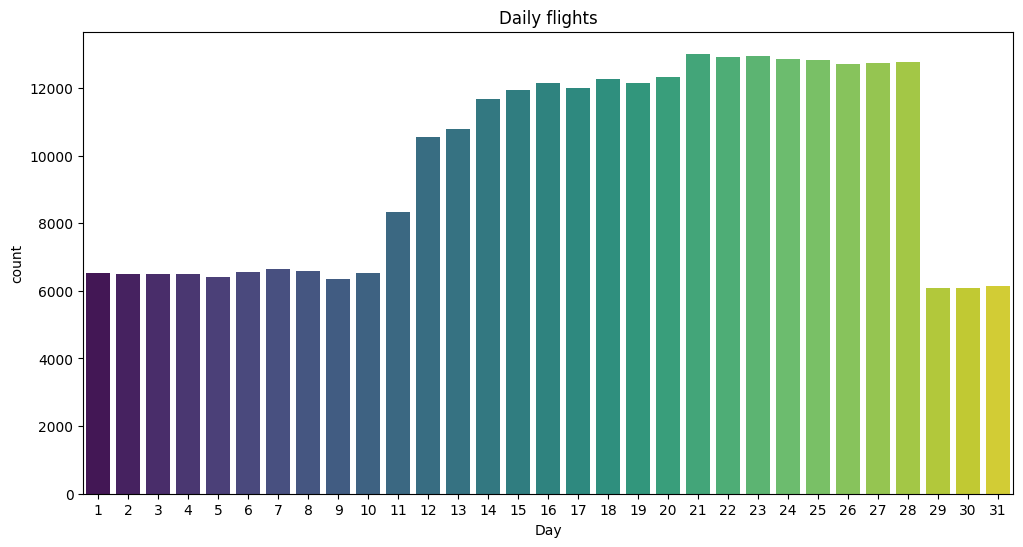

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day',y='count',data=daily_flights,palette='viridis')
plt.title('Daily flights')
plt.show()

<ipython-input-47-a8c1f1671157>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day',y='price',data=df,palette='Set2')


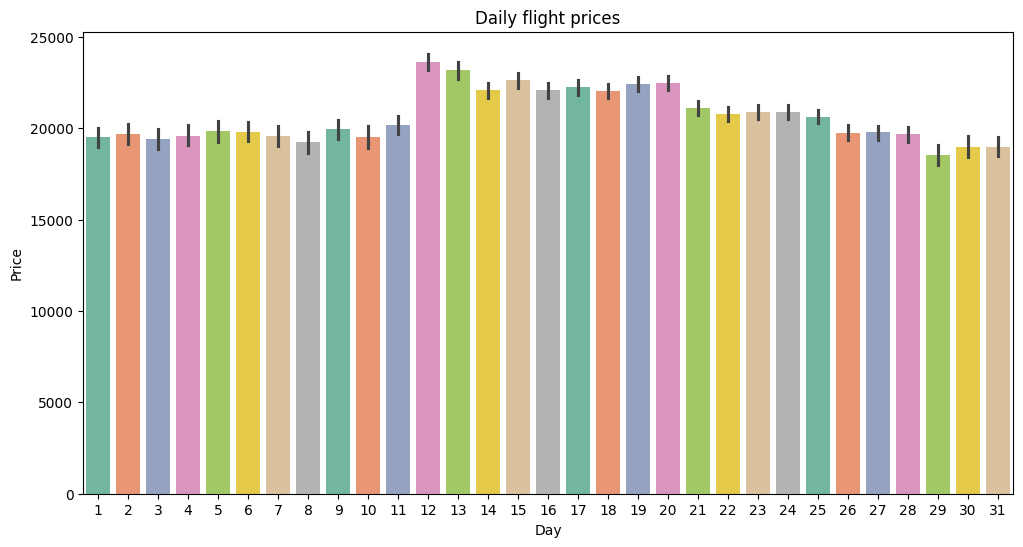

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day',y='price',data=df,palette='Set2')
plt.title('Daily flight prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [48]:
weekend_flights=df.groupby('Isweekend').size().reset_index(name='count')

In [49]:
weekend_flights

,Isweekend,count
0,0,216053
1,1,84208


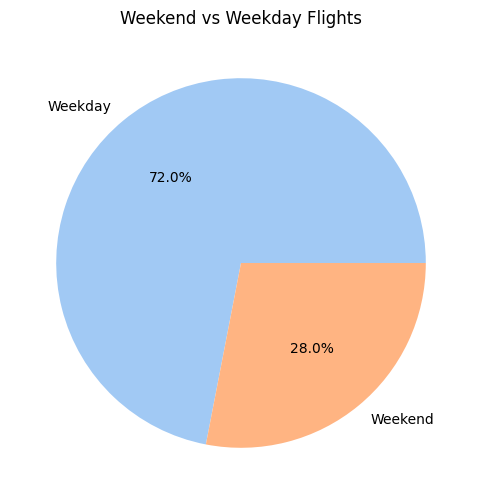

In [50]:
weekend_flights['Isweekend'] = weekend_flights['Isweekend'].map({0: 'Weekday', 1: 'Weekend'})

plt.figure(figsize=(10, 6))
plt.pie(
    weekend_flights['count'],
    labels=weekend_flights['Isweekend'],
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel')
)
plt.title('Weekend vs Weekday Flights')
plt.show()

In [51]:
weekend_price=df.groupby('Isweekend')['price'].mean()

In [52]:
weekend_price

,price
Isweekend,
0,20654.402128
1,21472.073995


<ipython-input-53-69a9b77c1fb1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Isweekend', y='price', data=weekend_weekday_price, palette='coolwarm')


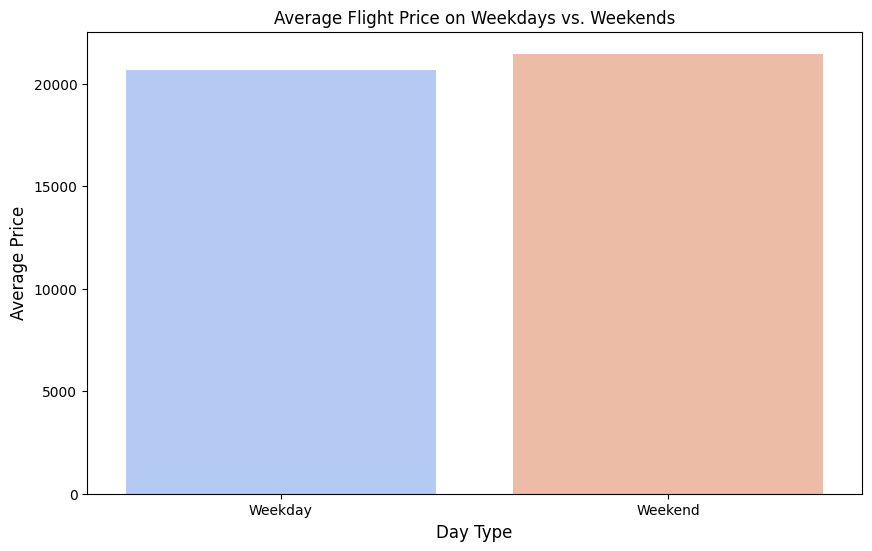

In [53]:
weekend_weekday_price = df.groupby('Isweekend')['price'].mean().reset_index()

# Replace 0 and 1 with labels for better readability
weekend_weekday_price['Isweekend'] = weekend_weekday_price['Isweekend'].replace({0: 'Weekday', 1: 'Weekend'})

# Plot the average price
plt.figure(figsize=(10, 6))
sns.barplot(x='Isweekend', y='price', data=weekend_weekday_price, palette='coolwarm')
plt.title('Average Flight Price on Weekdays vs. Weekends')
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()


In [54]:
stop_wise_flights=df.groupby('stop').size().reset_index(name='count')

In [55]:
stop_wise_flights

,stop,count
0,1-stop,243603
1,1-stop Via BBI,158
2,1-stop Via Bhubaneswar,301
3,1-stop Via Chennai,77
4,1-stop Via Delhi,153
5,1-stop Via GAU,3
6,1-stop Via GAY,3
7,1-stop Via GOP,16
8,1-stop Via Guwahati,55
9,1-stop Via HYD,1


In [56]:
flights_by_day=df.groupby('Day_of_week').size().reset_index(name='count')

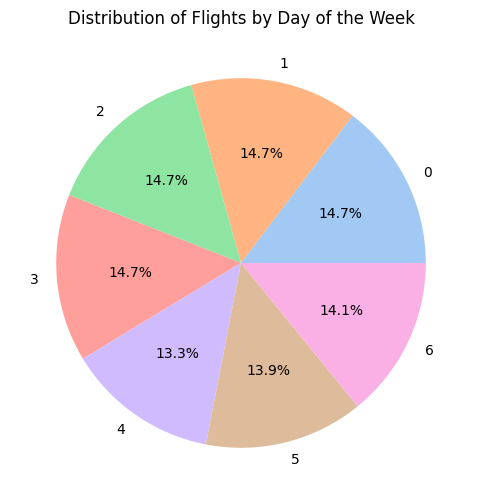

In [57]:
plt.figure(figsize=(10, 6))
plt.pie(flights_by_day['count'], labels=flights_by_day['Day_of_week'], autopct='%1.1f%%',colors=sns.color_palette('pastel')) # Changed 'flight_count' to 'count'
plt.title('Distribution of Flights by Day of the Week')
plt.show()

In [58]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'Departure_time', 'From',
       'Duration', 'stop', 'Arrival_time', 'To', 'price', 'class', 'Day',
       'Month', 'Year', 'Day_of_week', 'Isweekend'],
      dtype='object')

In [59]:
df.head()

,date,airline,ch_code,num_code,Departure_time,From,Duration,stop,Arrival_time,To,price,class,Day,Month,Year,Day_of_week,Isweekend
0,2022-02-11,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,Business,11,2,2022,4,0
1,2022-02-11,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,Business,11,2,2022,4,0
2,2022-02-11,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,Business,11,2,2022,4,0
3,2022-02-11,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,Business,11,2,2022,4,0
4,2022-02-11,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,Business,11,2,2022,4,0


In [60]:
df['flight'] = df['ch_code'] + df['num_code'].astype(str)

df.drop(['ch_code', 'num_code'], axis=1, inplace=True)

In [61]:
df.head()

,date,airline,Departure_time,From,Duration,stop,Arrival_time,To,price,class,Day,Month,Year,Day_of_week,Isweekend,flight
0,2022-02-11,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,Business,11,2,2022,4,0,AI868
1,2022-02-11,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,Business,11,2,2022,4,0,AI624
2,2022-02-11,Air India,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,Business,11,2,2022,4,0,AI531
3,2022-02-11,Air India,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,Business,11,2,2022,4,0,AI839
4,2022-02-11,Air India,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,Business,11,2,2022,4,0,AI544


In [66]:
def map_time_to_period(time_str):

    hour = int(time_str.split(':')[0])

    if 5 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    elif 20 <= hour or hour < 23:
        return "Night"
    else:
        return "Late Night"

df['departure_time'] = df['Departure_time'].apply(map_time_to_period)


In [67]:
df.head()

,date,airline,Departure_time,From,Duration,stop,Arrival_time,To,price,class,Day,Month,Year,Day_of_week,Isweekend,flight,departure_time
0,2022-02-11,Air India,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,Business,11,2,2022,4,0,AI868,Evening
1,2022-02-11,Air India,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,Business,11,2,2022,4,0,AI624,Evening
2,2022-02-11,Air India,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,42220,Business,11,2,2022,4,0,AI531,Night
3,2022-02-11,Air India,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,44450,Business,11,2,2022,4,0,AI839,Night
4,2022-02-11,Air India,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,46690,Business,11,2,2022,4,0,AI544,Evening


In [68]:
df.drop('Departure_time',axis=1,inplace=True)

In [69]:
def map_time_to_period(time_str):

    hour = int(time_str.split(':')[0])

    if 5 <= hour < 8:
        return "Early Morning"
    elif 8 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    elif 20 <= hour or hour < 23:
        return "Night"
    else:
        return "Late Night"

df['arrival_time'] = df['Arrival_time'].apply(map_time_to_period)


In [70]:
df.drop('Arrival_time',axis=1,inplace=True)

In [71]:
df.head()

,date,airline,From,Duration,stop,To,price,class,Day,Month,Year,Day_of_week,Isweekend,flight,departure_time,arrival_time
0,2022-02-11,Air India,Delhi,02h 00m,non-stop,Mumbai,25612,Business,11,2,2022,4,0,AI868,Evening,Night
1,2022-02-11,Air India,Delhi,02h 15m,non-stop,Mumbai,25612,Business,11,2,2022,4,0,AI624,Evening,Night
2,2022-02-11,Air India,Delhi,24h 45m,1-stop,Mumbai,42220,Business,11,2,2022,4,0,AI531,Night,Night
3,2022-02-11,Air India,Delhi,26h 30m,1-stop,Mumbai,44450,Business,11,2,2022,4,0,AI839,Night,Night
4,2022-02-11,Air India,Delhi,06h 40m,1-stop,Mumbai,46690,Business,11,2,2022,4,0,AI544,Evening,Night


In [72]:
df.columns

Index(['date', 'airline', 'From', 'Duration', 'stop', 'To', 'price', 'class',
       'Day', 'Month', 'Year', 'Day_of_week', 'Isweekend', 'flight',
       'departure_time', 'arrival_time'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
# Step 1: Label Encoding for categorical features
label_encoders = {}
for column in ['airline', 'stop', 'From', 'To', 'Duration','departure_time','arrival_time','class', 'flight']: # Include 'flight' column
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [94]:
# Step 2: Scaling 'price' column
scaler = MinMaxScaler()
df['price'] = scaler.fit_transform(df[['price']])

In [95]:
# Step 3: Define Features (X) and Target (y)
X = df.drop(['price','date'], axis=1)
y = df['price']

In [96]:
# Step 4: Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
y_pred=model.predict(X_test)

In [100]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [101]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-Squared : {r2}')

Mean Squared Error (MSE): 0.00033216994837800205
Mean Absolute Error (MAE): 0.007145999354618679
R-Squared : 0.9903843289736453
